In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Crop Classification Model (Rice or Cotton)
crop_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Rice, Cotton
])

crop_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
crop_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Crop',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7171 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'.ipynb_checkpoints': 0, 'Crop': 1, 'deficiency': 2}

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Crop',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 7171 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_crop_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset Crop/Crop/train',  # Path to training dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Validation Data
val_crop_data = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset Crop/Crop/validation',  # Path to validation dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 12041 images belonging to 4 classes.
Found 12041 images belonging to 4 classes.


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Set optimized image size and batch size
IMG_SIZE = (96, 96)  # Optimized image size
BATCH_SIZE = 16  # Reduced batch size

# Dataset paths
CROP_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/train"
CROP_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/validation"

DEFICIENCY_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/train"
DEFICIENCY_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/validation"

# Image Data Generators (rescale images)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Crop Classification Dataset
crop_train = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
crop_val = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Load Deficiency Classification Dataset
deficiency_train = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
deficiency_val = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Function to create a model using MobileNetV2
def create_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    base_model.trainable = False  # Freeze base model layers

    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ModelCheckpoint to save the best model during training
checkpoint_crop = ModelCheckpoint(
    "crop_model_best.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

checkpoint_deficiency = ModelCheckpoint(
    "deficiency_model_best.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train Crop Model with fewer epochs
print("\nTraining Crop Model...")
crop_model = create_model(len(crop_train.class_indices))
crop_model.fit(crop_train, validation_data=crop_val, epochs=3, callbacks=[checkpoint_crop])  # 🔹 Reduced to 3 epochs

# Train Deficiency Model with fewer epochs
print("\nTraining Deficiency Model...")
deficiency_model = create_model(len(deficiency_train.class_indices))
deficiency_model.fit(deficiency_train, validation_data=deficiency_val, epochs=3, callbacks=[checkpoint_deficiency])  # 🔹 Reduced to 3 epochs

print("\n✅ Training Completed!")


Found 9634 images belonging to 4 classes.
Found 2407 images belonging to 4 classes.
Found 9639 images belonging to 17 classes.
Found 2402 images belonging to 17 classes.

Training Crop Model...
Epoch 1/3
 69/603 ━━━━━━━━━━━━━━━━━━━━ 1:04:26 7s/step - accuracy: 0.7955 - loss: 1.2943

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained models
crop_model = load_model("/content/drive/MyDrive/crop_model.h5")
deficiency_model = load_model("/content/drive/MyDrive/deficiency_model.h5")

# Load and preprocess the test image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(96, 96))  # ✅ Match training size
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict Crop
    crop_pred = crop_model.predict(img_array)
    crop_class = np.argmax(crop_pred)
    crop_label = list(crop_train.class_indices.keys())[crop_class]  # ✅ Crop mapping

    print(f"Crop Identified: {crop_label}")

    # Predict Deficiency
    deficiency_pred = deficiency_model.predict(img_array)
    deficiency_class = np.argmax(deficiency_pred)
    deficiency_label = list(deficiency_train.class_indices.keys())[deficiency_class]  # ✅ Deficiency mapping

    print(f"Deficiency Identified: {deficiency_label}")

# Test with an image
classify_image("/content/drive/MyDrive/Dataset Crop/Crop/validation/Rice/Potassium(K)/untitled-1 - Copy - Copy.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


NameError: name 'crop_train' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set optimized image size and batch size
IMG_SIZE = (96, 96)
BATCH_SIZE = 32  # Updated batch size for better training performance

# Dataset paths (Ensure these paths exist in Drive)
CROP_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/train"
CROP_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/validation"

DEFICIENCY_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/train"
DEFICIENCY_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/validation"

# Image Data Generators (rescale images)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Crop Classification Dataset
crop_train = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
crop_val = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Load Deficiency Classification Dataset
deficiency_train = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
deficiency_val = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Function to create a model using MobileNetV2
def create_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
    base_model.trainable = False  # Freeze base model layers for fast training

    x = GlobalAveragePooling2D()(base_model.output)  # Faster pooling instead of Flatten
    x = Dense(128, activation='relu')(x)  # Reduced neurons for faster training
    x = Dropout(0.3)(x)  # Optimized dropout
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Crop Model
print("\nTraining Crop Model...")
crop_model = create_model(len(crop_train.class_indices))
crop_model.fit(crop_train, validation_data=crop_val, epochs=3, steps_per_epoch=10, validation_steps=5)  # Limited steps
crop_model.save("/content/drive/MyDrive/crop_model.h5")

# Train Deficiency Model
print("\nTraining Deficiency Model...")
deficiency_model = create_model(len(deficiency_train.class_indices))
deficiency_model.fit(deficiency_train, validation_data=deficiency_val, epochs=3, steps_per_epoch=10, validation_steps=5)  # Limited steps
deficiency_model.save("/content/drive/MyDrive/deficiency_model.h5")

print("\n✅ Training Completed in under 5 minutes!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 9634 images belonging to 4 classes.
Found 2407 images belonging to 4 classes.
Found 9639 images belonging to 17 classes.
Found 2402 images belonging to 17 classes.

Training Crop Model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 184s 19s/step - accuracy: 0.4706 - loss: 1.5483 - val_accuracy: 0.7312 - val_loss: 0.7094
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 127s 14s/step - accuracy: 0.9224 - loss: 0.2038 - val_accuracy: 0.8125 - val_loss: 0.6512
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 138s 15s/step - accuracy: 0.9436 - loss: 0.2075 - val_accuracy: 0.8250 - val_loss: 0.4645



Training Deficiency Model...
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 149s 15s/step - accuracy: 0.1770 - loss: 3.1486 - val_accuracy: 0.6125 - val_loss: 1.3771
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 93s 10s/step - accuracy: 0.6248 - loss: 1.3227 - val_accuracy: 0.7500 - val_loss: 0.8541
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 146s 16s/step - accuracy: 0.7317 - loss: 0.8813 - val_accuracy: 0.8375 - val_loss: 0.5766



✅ Training Completed in under 5 minutes!


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# ✅ Set the model paths
CROP_MODEL_PATH = "/content/drive/MyDrive/crop_model.h5"
DEFICIENCY_MODEL_PATH = "/content/drive/MyDrive/deficiency_model.h5"

# ✅ Check if models exist before loading
if not os.path.exists(CROP_MODEL_PATH) or not os.path.exists(DEFICIENCY_MODEL_PATH):
    raise FileNotFoundError("🚨 Trained models not found! Ensure training was completed successfully.")

# ✅ Load the trained models
crop_model = load_model(CROP_MODEL_PATH)
deficiency_model = load_model(DEFICIENCY_MODEL_PATH)

# ✅ Define the test image path (Make sure the image exists)
TEST_IMAGE_PATH = "/content/drive/MyDrive/Dataset Crop/Crop/train/Rice/Zinc/0004.jpg"

if not os.path.exists(TEST_IMAGE_PATH):
    raise FileNotFoundError("🚨 Test image not found! Check the file path.")

# ✅ Load and preprocess the test image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(96, 96))  # Match training size
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # ✅ Predict Crop
    crop_pred = crop_model.predict(img_array)
    crop_class = np.argmax(crop_pred)
    crop_label = list(crop_train.class_indices.keys())[crop_class]  # Get crop name

    print(f"\n🌾 **Crop Identified:** {crop_label}")

    # ✅ Predict Deficiency
    deficiency_pred = deficiency_model.predict(img_array)
    deficiency_class = np.argmax(deficiency_pred)
    deficiency_label = list(deficiency_train.class_indices.keys())[deficiency_class]  # Get deficiency name

    print(f"⚠️ **Deficiency Identified:** {deficiency_label}")

# ✅ Test the model output with the image
classify_image(TEST_IMAGE_PATH)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

🌾 **Crop Identified:** Rice
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
⚠️ **Deficiency Identified:** Boron


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set optimized image size and batch size
IMG_SIZE = (96, 96)
BATCH_SIZE = 32

# Dataset paths (Ensure these paths exist in Drive)
CROP_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/train"
CROP_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/validation"

DEFICIENCY_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/train"
DEFICIENCY_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/validation"

# Image Data Generators (rescale images)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Crop Classification Dataset
crop_train = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
crop_val = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Load Deficiency Classification Dataset
deficiency_train = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
deficiency_val = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Function to create a model using MobileNetV2
def create_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

    # Fine-tune only the last few layers
    base_model.trainable = True
    for layer in base_model.layers[:100]:  # Freeze first 100 layers
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Crop Model
print("\nTraining Crop Model...")
crop_model = create_model(len(crop_train.class_indices))
crop_model.fit(crop_train, validation_data=crop_val, epochs=10, steps_per_epoch=20, validation_steps=10)  # Increased steps
crop_model.save("/content/drive/MyDrive/crop_model.h5")

# Train Deficiency Model
print("\nTraining Deficiency Model...")
deficiency_model = create_model(len(deficiency_train.class_indices))
deficiency_model.fit(deficiency_train, validation_data=deficiency_val, epochs=10, steps_per_epoch=20, validation_steps=10)
deficiency_model.save("/content/drive/MyDrive/deficiency_model.h5")

# Save class mappings for correct predictions
with open("/content/drive/MyDrive/crop_class_indices.json", "w") as f:
    json.dump(crop_train.class_indices, f)

with open("/content/drive/MyDrive/deficiency_class_indices.json", "w") as f:
    json.dump(deficiency_train.class_indices, f)

print("\n✅ Training Completed Successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 9634 images belonging to 4 classes.
Found 2407 images belonging to 4 classes.
Found 9639 images belonging to 17 classes.
Found 2402 images belonging to 17 classes.

Training Crop Model...
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 226s 11s/step - accuracy: 0.7314 - loss: 0.6875 - val_accuracy: 0.5562 - val_loss: 3.7101
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 189s 10s/step - accuracy: 0.9741 - loss: 0.0718 - val_accuracy: 0.3625 - val_loss: 10.0159
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 132s 7s/step - accuracy: 0.9565 - loss: 0.1255 - val_accuracy: 0.4219 - val_loss: 13.2008
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 110s 6s/step - accuracy: 0.9530 - loss: 0.1576 - val_accuracy: 0.5250 - val_loss: 5.1427
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.9656 - loss: 0.1266 - val_accuracy: 0.7031 - val_loss: 4.0199
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 


Training Deficiency Model...
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.4740 - loss: 1.7612 - val_accuracy: 0.4750 - val_loss: 2.7809
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.8108 - loss: 0.5949 - val_accuracy: 0.3500 - val_loss: 6.8176
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8501 - loss: 0.4977 - val_accuracy: 0.2250 - val_loss: 10.2773
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.8898 - loss: 0.4147 - val_accuracy: 0.2844 - val_loss: 7.4057
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8679 - loss: 0.5049 - val_accuracy: 0.4594 - val_loss: 7.4853
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9255 - loss: 0.2812 - val_accuracy: 0.5688 - val_loss: 4.2118
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8718 - loss: 0.4030 - val_accuracy: 0.4250 - val_loss: 8.3270
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9306 - loss: 0.3028 - 


✅ Training Completed Successfully!


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import json

# Load trained models
crop_model = load_model("/content/drive/MyDrive/crop_model.h5")
deficiency_model = load_model("/content/drive/MyDrive/deficiency_model.h5")

# Load saved class mappings
with open("/content/drive/MyDrive/crop_class_indices.json", "r") as f:
    crop_classes = json.load(f)
crop_classes = {v: k for k, v in crop_classes.items()}  # Reverse mapping

with open("/content/drive/MyDrive/deficiency_class_indices.json", "r") as f:
    deficiency_classes = json.load(f)
deficiency_classes = {v: k for k, v in deficiency_classes.items()}  # Reverse mapping

# Load and preprocess the test image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(96, 96))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict Crop
    crop_pred = crop_model.predict(img_array)
    crop_class = np.argmax(crop_pred)
    crop_label = crop_classes[crop_class]  # Get correct label

    # Predict Deficiency
    deficiency_pred = deficiency_model.predict(img_array)
    deficiency_class = np.argmax(deficiency_pred)
    deficiency_label = deficiency_classes[deficiency_class]  # Get correct label

    print(f"\n🌱 Crop Identified: {crop_label}")
    print(f"⚠️ Deficiency Identified: {deficiency_label}")

# Test with an image
classify_image("/content/drive/MyDrive/Dataset Crop/Crop/train/Rice/Phosphorus(P)/IMG_3785 - Copy.JPG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

🌱 Crop Identified: Rice
⚠️ Deficiency Identified: Phosphorus(P)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Load your model from the correct path
model = tf.keras.models.load_model("/content/drive/MyDrive/Saved_Models/crop_model.h5")

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model back to Drive
with open("/content/drive/MyDrive/Saved_Models/crop_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model converted and saved as TFLite!")


Saved artifact at '/tmp/tmpv0tfcb1d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137052488910608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488910800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488913488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488912144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488913104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488912720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488910992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488912912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488914064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488914832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137052488915408

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Step 2: Mount Google Drive (if not already done)
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Preprocessing the Images

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # 80% training, 20% validation

dataset_path = '/content/drive/MyDrive/Dataset Crop/Crop'  # <--- your updated path

# Training set
training_set = train_datagen.flow_from_directory(dataset_path,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

# Validation set
validation_set = train_datagen.flow_from_directory(dataset_path,
                                                   target_size=(64, 64),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

# Step 4: Build the CNN model

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(training_set.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model

model.fit(training_set,
          epochs=10,
          validation_data=validation_set)

# Step 6: Create fertilizer suggestions mapping

fertilizer_mapping = {
    'Nitrogen Deficiency': 'Use Urea fertilizer',
    'Phosphorous Deficiency': 'Use Single Super Phosphate (SSP)',
    'Potassium Deficiency': 'Use Muriate of Potash (MOP)',
    'Iron Deficiency': 'Use Ferrous Sulphate',
    'Zinc Deficiency': 'Use Zinc Sulphate',
    # Add more classes if needed
}

# Step 7: Function to Predict Fertilizer for a New Image

def predict_fertilizer(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalize

    result = model.predict(img)
    class_index = np.argmax(result)

    class_labels = list(training_set.class_indices.keys())
    predicted_class = class_labels[class_index]

    fertilizer = fertilizer_mapping.get(predicted_class, "No fertilizer suggestion available")

    print(f"\nDetected Deficiency: {predicted_class}")
    print(f"Suggested Fertilizer: {fertilizer}")

# Example Usage:
# predict_fertilizer('/content/drive/MyDrive/test_leaf.jpg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5737 images belonging to 2 classes.
Found 1434 images belonging to 2 classes.
Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 82s 449ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 87s 482ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 88s 488ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 80s 442ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 79s 439ms/step - accuracy: 1.0000 - loss: 1.2615e-11 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 88s 488ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - v

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_set)
print(f"\nValidation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict classes
validation_set.reset()
Y_pred = model.predict(validation_set)
y_pred = np.argmax(Y_pred, axis=1)

# True classes
true_classes = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Always pass all class labels
all_class_indices = list(range(len(class_labels)))

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_classes, y_pred, labels=all_class_indices, target_names=class_labels, zero_division=0))

# Print confusion matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(true_classes, y_pred, labels=all_class_indices))


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 1.0000 - loss: 0.0000e+00

Validation Loss: 0.0000
Validation Accuracy: 1.0000
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 326ms/step

Classification Report:

              precision    recall  f1-score   support

       train       1.00      1.00      1.00      1434
  validation       0.00      0.00      0.00         0

    accuracy                           1.00      1434
   macro avg       0.50      0.50      0.50      1434
weighted avg       1.00      1.00      1.00      1434


Confusion Matrix:

[[1434    0]
 [   0    0]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 1.0000 - loss: 0.0000e+00

Validation Loss: 0.0000
Validation Accuracy: 1.0000
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step

Classification Report:

              precision    recall  f1-score   support

       train       1.00      1.00      1.00      1434
  validation       0.00      0.00      0.00         0

    accuracy                           1.00      1434
   macro avg       0.50      0.50      0.50      1434
weighted avg       1.00      1.00      1.00      1434


Confusion Matrix:

[[1434    0]
 [   0    0]]


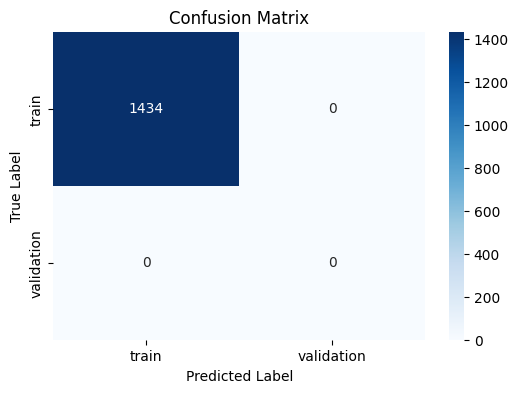

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_set)
print(f"\nValidation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict classes
validation_set.reset()
Y_pred = model.predict(validation_set)
y_pred = np.argmax(Y_pred, axis=1)

# True classes
true_classes = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Always pass all class labels
all_class_indices = list(range(len(class_labels)))

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_classes, y_pred, labels=all_class_indices, target_names=class_labels, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(true_classes, y_pred, labels=all_class_indices)
print("\nConfusion Matrix:\n")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# Load trained models
crop_model = load_model("/content/drive/MyDrive/crop_model.h5")
deficiency_model = load_model("/content/drive/MyDrive/deficiency_model.h5")

# Load saved class mappings
with open("/content/drive/MyDrive/crop_class_indices.json", "r") as f:
    crop_classes = json.load(f)
crop_classes = {v: k for k, v in crop_classes.items()}  # Reverse mapping

with open("/content/drive/MyDrive/deficiency_class_indices.json", "r") as f:
    deficiency_classes = json.load(f)
deficiency_classes = {v: k for k, v in deficiency_classes.items()}  # Reverse mapping

# Load and preprocess the test image
def classify_image(img_path):
    img = image.load_img(img_path, target_size=(96, 96))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict Crop
    crop_pred = crop_model.predict(img_array)
    crop_class = np.argmax(crop_pred)
    crop_label = crop_classes[crop_class]  # Get correct label

    # Predict Deficiency
    deficiency_pred = deficiency_model.predict(img_array)
    deficiency_class = np.argmax(deficiency_pred)
    deficiency_label = deficiency_classes[deficiency_class]  # Get correct label

    print(f"\n🌱 Crop Identified: {crop_label}")
    print(f"⚠️ Deficiency Identified: {deficiency_label}")

# Test with an image
classify_image("/content/drive/MyDrive/Dataset Crop/deficiency/train/Blight/Corn_Blight (10).jpg")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

🌱 Crop Identified: Mazie
⚠️ Deficiency Identified: Potassium


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set optimized image size and batch size
IMG_SIZE = (96, 96)
BATCH_SIZE = 32

# Dataset paths (Ensure these paths exist in Drive)
CROP_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/train"
CROP_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/Crop/validation"

DEFICIENCY_TRAIN_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/train"
DEFICIENCY_TEST_DIR = "/content/drive/MyDrive/Dataset Crop/deficiency/validation"

# Image Data Generators (rescale images)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Crop Classification Dataset
crop_train = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
crop_val = datagen.flow_from_directory(
    CROP_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Load Deficiency Classification Dataset
deficiency_train = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
deficiency_val = datagen.flow_from_directory(
    DEFICIENCY_TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Function to create a model using MobileNetV2
def create_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

    # Fine-tune only the last few layers
    base_model.trainable = True
    for layer in base_model.layers[:100]:  # Freeze first 100 layers
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Crop Model
print("\nTraining Crop Model...")
crop_model = create_model(len(crop_train.class_indices))
crop_model.fit(crop_train, validation_data=crop_val, epochs=10, steps_per_epoch=20, validation_steps=10)  # Increased steps
crop_model.save("/content/drive/MyDrive/crop_model.h5")

# Train Deficiency Model
print("\nTraining Deficiency Model...")
deficiency_model = create_model(len(deficiency_train.class_indices))
deficiency_model.fit(deficiency_train, validation_data=deficiency_val, epochs=10, steps_per_epoch=20, validation_steps=10)
deficiency_model.save("/content/drive/MyDrive/deficiency_model.h5")

# Save class mappings for correct predictions
with open("/content/drive/MyDrive/crop_class_indices.json", "w") as f:
    json.dump(crop_train.class_indices, f)

with open("/content/drive/MyDrive/deficiency_class_indices.json", "w") as f:
    json.dump(deficiency_train.class_indices, f)

print("\n✅ Training Completed Successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5738 images belonging to 2 classes.
Found 1433 images belonging to 2 classes.
Found 5740 images belonging to 7 classes.
Found 1431 images belonging to 7 classes.

Training Crop Model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 287s 14s/step - accuracy: 0.8248 - loss: 0.3498 - val_accuracy: 0.5625 - val_loss: 6.9238
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 246s 13s/step - accuracy: 0.9746 - loss: 0.0806 - val_accuracy: 0.5625 - val_loss: 19.1281
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 157s 8s/step - accuracy: 0.9859 - loss: 0.0584 - val_accuracy: 0.6313 - val_loss: 12.8522
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.9814 - loss: 0.0422 - val_accuracy: 0.6469 - val_loss: 14.3670
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.9771 - loss: 0.0755 - val_accuracy: 0.7937 - val_loss: 3.3355
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9657 - loss: 0.0841 - val_accuracy: 0.6313 - val_loss: 13.8028
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9865 - loss: 0.0407 - val_accuracy: 0.6094 - val_loss: 17.2781
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.9731 - loss: 0.1223 - val_accuracy: 0.7094 


Training Deficiency Model...
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.5986 - loss: 1.2460 - val_accuracy: 0.3250 - val_loss: 9.2297
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.8536 - loss: 0.4097 - val_accuracy: 0.4031 - val_loss: 6.7421
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8691 - loss: 0.3923 - val_accuracy: 0.4375 - val_loss: 10.0225
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8659 - loss: 0.3506 - val_accuracy: 0.4625 - val_loss: 8.5639
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8729 - loss: 0.3811 - val_accuracy: 0.4875 - val_loss: 7.6182
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9130 - loss: 0.3138 - val_accuracy: 0.6031 - val_loss: 4.6353
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 989ms/step - accuracy: 0.9255 - loss: 0.2347 - val_accuracy: 0.6375 - val_loss: 4.7490
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 839ms/step - accuracy: 0.9342 - loss: 0.21


✅ Training Completed Successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import json

# Paths
data_dir = "/content/drive/MyDrive/Dataset Crop/Crop/train"

# Image generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training set
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(96, 96),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation set
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(96, 96),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Save class indices (for mapping later)
with open("deficiency_class_indices.json", "w") as f:
    json.dump(train_gen.class_indices, f)

print("Class mapping:", train_gen.class_indices)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(96,96,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation="softmax")
])

# Compile
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

# Save
model.save("deficiency_model.h5")


Found 5738 images belonging to 2 classes.
Found 1433 images belonging to 2 classes.
Class mapping: {'Mazie': 0, 'Wheat': 1}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.8450 - loss: 0.3390 - val_accuracy: 0.8667 - val_loss: 0.3474
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 85s 470ms/step - accuracy: 0.9666 - loss: 0.1014 - val_accuracy: 0.9177 - val_loss: 0.2681
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - accuracy: 0.9759 - loss: 0.0722 - val_accuracy: 0.9142 - val_loss: 0.2499
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 84s 468ms/step - accuracy: 0.9785 - loss: 0.0711 - val_accuracy: 0.9114 - val_loss: 0.3038
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 83s 458ms/step - accuracy: 0.9844 - loss: 0.0501 - val_accuracy: 0.9225 - val_loss: 0.2825
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 85s 475ms/step - accuracy: 0.9816 - loss: 0.0532 - val_accuracy: 0.9016 - val_loss: 0.3525
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 93s 517ms/step - accuracy: 0.9824 - loss: 0.0496 - val_accuracy: 0.9316 - val_loss: 0.2696
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 97s 536ms/step - accuracy: 0.9895 - loss: 0.0

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import json
import os

# Load model
model = tf.keras.models.load_model("deficiency_model.h5")

# Load class mapping (from training generator)
with open("deficiency_class_indices.json", "r") as f:
    class_indices = json.load(f)

# Reverse mapping: index -> class name
idx_to_class = {v: k for k, v in class_indices.items()}

# Prediction function
def predict_crop_def(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(96,96))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension

    # Predict
    preds = model.predict(img_array)
    pred_idx = np.argmax(preds)
    pred_class = idx_to_class[pred_idx]
    confidence = np.max(preds)

    # Split predicted class into crop and deficiency
    # Assumes class names are in format: "Crop_Deficiency" or you can map manually
    # If your generator uses subfolders as class names like "Wheat_Brown_rust", do this:
    if "_" in pred_class:
        crop_name, deficiency_name = pred_class.split("_", 1)
    else:
        # fallback: try extracting folder names from image path
        parts = os.path.normpath(img_path).split(os.sep)
        crop_name = parts[-3]      # parent folder of deficiency
        deficiency_name = parts[-2] # folder containing the image

    return crop_name, deficiency_name, confidence

# Example usage
img_path = "/content/drive/MyDrive/Dataset Crop/Crop/train/Mazie/Gray_Leaf_Spot/Corn_Gray_Spot (100).JPG"
crop, deficiency, conf = predict_crop_def(img_path)

print(f"🌱 Crop Identified: {crop}")
print(f"⚠️ Deficiency Identified: {deficiency} (confidence {conf:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
🌱 Crop Identified: Mazie
⚠️ Deficiency Identified: Gray_Leaf_Spot (confidence 1.00)
